In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/US_Heart_Patients.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4240, 16)

In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

We can see that there are few null values. Hence we can fill it by using forward fill as the null values are small.

In [5]:
df = df.fillna(method='ffill')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10 )
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.7759433962264151


## Hyperparameter Tuning
### Grid Search

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [12]:
dt = DecisionTreeClassifier()

params = {'max_depth' : [2,3,4,5,6,7,8],
        'min_samples_split': [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}

For Grid search we considered max_depth between 2 to 8, min_samples_split between 2 to 10 and min_samples_leaf between 1 to 10. The best parameter for the decision was found to be 2, 5 and 2.

Now we will build decision tree using these hyperparameters.
Also we will Select the best model using the AUC curve.
The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=1)

In [14]:
dt = DecisionTreeClassifier(**gsearch.best_params_)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.8460242587601078
Accuracy of Decision Tree-Test:  0.8529874213836478


In [15]:
print('AUC of Decision Tree-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Decision Tree-Test: ', roc_auc_score(y_test, y_prob))

AUC of Decision Tree-Train:  0.6691859973665107
AUC of Decision Tree-Test:  0.6800931516301536


### Hyperparameter Tuning - Random Search

In [16]:
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : sp_randint(2,10),
        'min_samples_split': sp_randint(2,50),
        'min_samples_leaf': sp_randint(1,20),
         'criterion':['gini', 'entropy']}

rand_search = RandomizedSearchCV(dt, param_distributions=params, cv=3, 
                                 random_state=1)

rand_search.fit(X, y)
print(rand_search.best_params_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 17, 'min_samples_split': 3}


In [17]:
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.8460242587601078
Accuracy of Decision Tree-Test:  0.8529874213836478


In [18]:
print('AUC of Decision Tree-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Decision Tree-Test: ', roc_auc_score(y_test, y_prob))

AUC of Decision Tree-Train:  0.6786345767899142
AUC of Decision Tree-Test:  0.6958451415756919


## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))


Accuracy of Random Forest-Train:  0.9797843665768194
Accuracy of Random Forest-Test:  0.845125786163522


In [20]:
print('AUC of Random Forest-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Random Forest-Test: ', roc_auc_score(y_test, y_prob))

AUC of Random Forest-Train:  0.9994444575160323
AUC of Random Forest-Test:  0.6364055299539171


We noticed that there is large difference between the model performance Train and Test. Hence, we will tune the Hyperparamter and check the results.

### Hyperparameter Tuning of Random Forest

In [21]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,25),
    'criterion': ['gini', 'entropy'],
    'max_depth': sp_randint(2, 10),
    'min_samples_split': sp_randint(2,20),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': sp_randint(2,15)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params,
                                 cv=3, random_state=1)

rand_search_rfc.fit(X, y)
print(rand_search_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 12, 'min_samples_leaf': 17, 'min_samples_split': 15, 'n_estimators': 24}


In [22]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)

rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.8584905660377359
Accuracy of Random Forest-Test:  0.8529874213836478


In [23]:
print('AUC of Random Forest-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Random Forest-Test: ', roc_auc_score(y_test, y_prob))

AUC of Random Forest-Train:  0.8281042624705128
AUC of Random Forest-Test:  0.7188299366667489


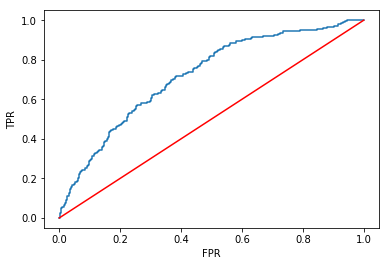

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## k-NN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [27]:
knn.fit(X_trains, y_train)

y_pred_train = knn.predict(X_trains)
y_prob_train = knn.predict_proba(X_trains)[:,1]

y_pred = knn.predict(X_tests)
y_prob = knn.predict_proba(X_tests)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of kNN-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of kNN-Test: ', accuracy_score(y_pred, y_test))

Accuracy of kNN-Train:  0.8655660377358491
Accuracy of kNN-Test:  0.8427672955974843


In [28]:
print('AUC of kNN-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN-Test: ', roc_auc_score(y_test, y_prob))

AUC of kNN-Train:  0.8658990158837222
AUC of kNN-Test:  0.6354715493235418


In [29]:
knn = KNeighborsClassifier()

params = {'n_neighbors': sp_randint(1,20),
        'p': sp_randint(1,5)}

rand_search_knn = RandomizedSearchCV(knn, param_distributions=params,
                                 cv=3, random_state=1)
rand_search_knn.fit(Xs, y)
print(rand_search_knn.best_params_)

{'n_neighbors': 10, 'p': 4}


In [30]:
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

knn.fit(X_trains, y_train)

y_pred_train = knn.predict(X_trains)
y_prob_train = knn.predict_proba(X_trains)[:,1]

y_pred = knn.predict(X_tests)
y_prob = knn.predict_proba(X_tests)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

print('Accuracy of Random Forest-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Random Forest-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Random Forest-Train:  0.8514150943396226
Accuracy of Random Forest-Test:  0.8522012578616353


In [31]:
print('AUC of kNN-Train: ', roc_auc_score(y_train, y_prob_train))
print('AUC of kNN-Test: ', roc_auc_score(y_test, y_prob))

AUC of kNN-Train:  0.807019355535861
AUC of kNN-Test:  0.6496192611942138


## Stacking Algorithms

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(**rand_search_rfc.best_params_)
knn = KNeighborsClassifier(**rand_search_knn.best_params_)

In [34]:
clf = VotingClassifier(estimators=[('lr',lr), ('rfc',rfc), ('knn',knn)], 
                       voting='soft')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [35]:
print('Accuracy of Stacked Algos-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Stacked Algos-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Stacked Algos-Train:  0.8544474393530997
Accuracy of Stacked Algos-Test:  0.8537735849056604


In [36]:
print('AUC of Stacked Algos: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Stacked Algos: ', roc_auc_score(y_test, y_prob))

AUC of Stacked Algos:  0.8274829263276595
AUC of Stacked Algos:  0.725853273860864


In [37]:
clf = VotingClassifier(estimators=[('lr',lr), ('rfc',rfc), ('knn',knn)], 
                       voting='soft', weights=[2,3,1])
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_prob_train = clf.predict_proba(X_train)[:,1]

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

In [38]:
print('Accuracy of Stacked Algos-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Stacked Algos-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Stacked Algos-Train:  0.8537735849056604
Accuracy of Stacked Algos-Test:  0.8545597484276729


In [39]:
print('AUC of Stacked Algos: ', roc_auc_score(y_train, y_prob_train))
print('AUC of Stacked Algos: ', roc_auc_score(y_test, y_prob))

AUC of Stacked Algos:  0.8188887930305779
AUC of Stacked Algos:  0.7467113531629661
